In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

        Movie Rank  Year of Release  IMDB Rating
count  1910.000000      1910.000000  1910.000000
mean    500.619895      1978.260733     7.860733
std     288.336847        27.147678     0.330828
min       1.000000      1902.000000     5.700000
25%     251.250000      1957.000000     7.700000
50%     500.500000      1979.000000     7.900000
75%     749.000000      2003.000000     8.100000
max    1000.000000      2019.000000     9.300000


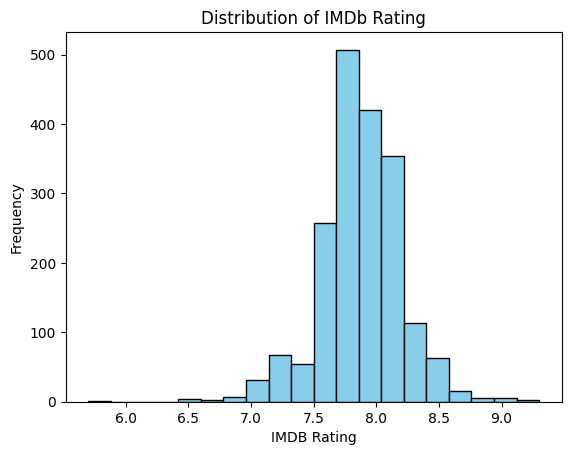

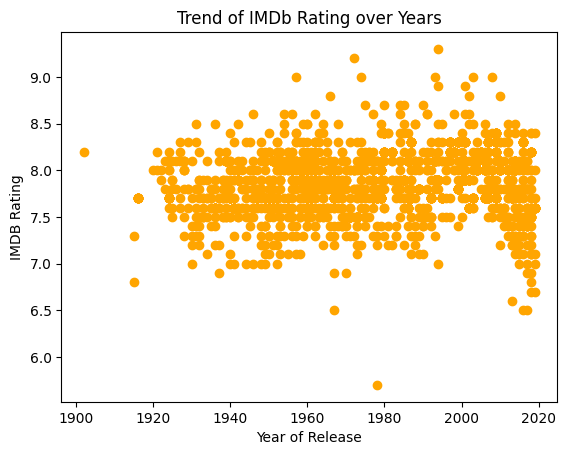

Mean Squared Error: 0.07483511388181047


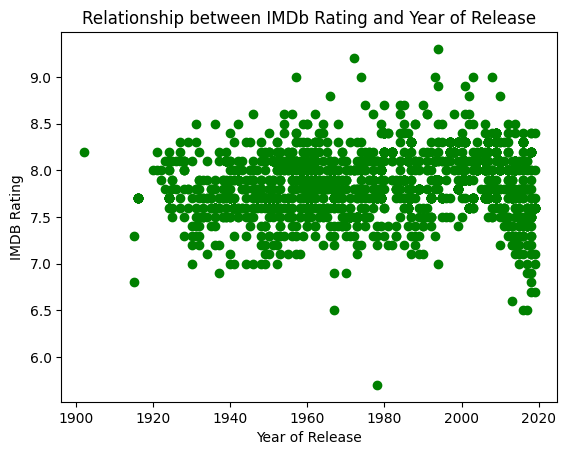

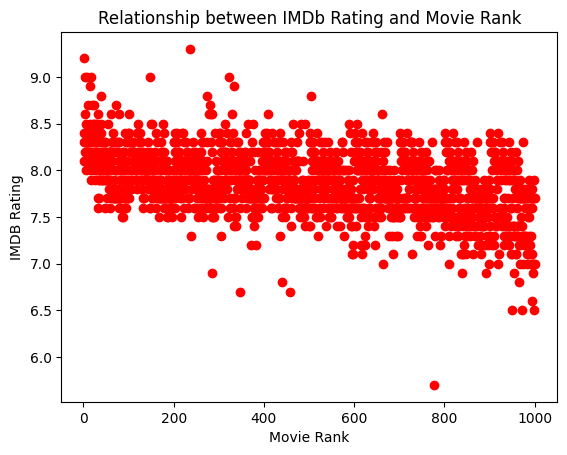

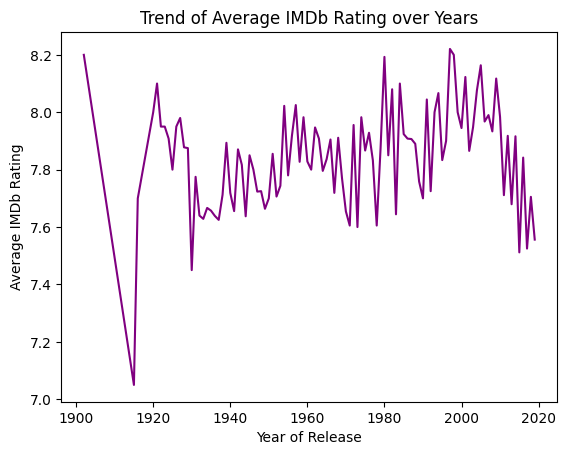

In [2]:
# Load dataset
df = pd.read_csv('/kaggle/input/imdb-top-2000-movies/IMDb Top 2000 Movies.csv',encoding='latin-1')

# Menghapus baris dengan nilai 'Year of Release' yang tidak valid
df = df[df['Year of Release'].str.isnumeric()]

# Konversi kolom 'Year of Release' menjadi tipe data numerik
df['Year of Release'] = df['Year of Release'].astype(int)

# 1. Analisis eksplorasi data
# Statistik deskriptif
print(df.describe())

# Distribusi IMDb Rating
plt.hist(df['IMDB Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Rating')
plt.show()

# Trend perubahan IMDb Rating dari waktu ke waktu
plt.plot(df['Year of Release'], df['IMDB Rating'], 'o', color='orange')
plt.xlabel('Year of Release')
plt.ylabel('IMDB Rating')
plt.title('Trend of IMDb Rating over Years')
plt.show()

# 2. Pemodelan Machine Learning
# Persiapkan data
X = df[['Year of Release', 'Movie Rank']]
y = df['IMDB Rating']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi IMDb Rating untuk data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# 3. Analisis hubungan
# Hubungan antara IMDb Rating dengan Year of Release
plt.scatter(df['Year of Release'], df['IMDB Rating'], color='green')
plt.xlabel('Year of Release')
plt.ylabel('IMDB Rating')
plt.title('Relationship between IMDb Rating and Year of Release')
plt.show()

# Hubungan antara IMDb Rating dengan Movie Rank
plt.scatter(df['Movie Rank'], df['IMDB Rating'], color='red')
plt.xlabel('Movie Rank')
plt.ylabel('IMDB Rating')
plt.title('Relationship between IMDb Rating and Movie Rank')
plt.show()

# 4. Analisis tren
# Perubahan rata-rata IMDb Rating dari tahun ke tahun
avg_rating_by_year = df.groupby('Year of Release')['IMDB Rating'].mean()
plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, color='purple')
plt.xlabel('Year of Release')
plt.ylabel('Average IMDb Rating')
plt.title('Trend of Average IMDb Rating over Years')
plt.show()